## EE 242 Lab 1 – Signal Modification

Sabrina Hwang, Bryan Vo, Ting Jones

In [1]:
# We'll refer to this as the "import cell." Every module you import should be imported here.
%matplotlib notebook
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import simpleaudio as sa
from scipy.io import wavfile as wav
from decimal import *
from scipy import signal as sig
# import whatever other modules you use in this lab -- there are more that you need than we've included 

## Summary

This lab presents a series of exercises to introduce the manipulation of audio signals and exploration of the impact of different amplitude and time operations on signals.

## Section 1: Working with sound files

In [140]:
# Playing and Plotting Time Scaled Audio Files 

# Part A

# reads .wav file
wav_obj_32 = sa.WaveObject.from_wave_file('train32.wav')

# obtains sample rate and array
fs1, x1 = wav.read('train32.wav')

# obtains the number of channels
channels = wav_obj_32.num_channels

# obtains the length
length = len(x1)

print('**Part A Solutions**')
print('Sampling rate = ', fs1)
print('Length = ', len(x1))
print('Number of channels = ', channels)
print()


# Part B

# calculates new sampling rates
fs2 = int(fs1 / 2)
fs3 = int(1.5 * fs1)

# writing .wav files of different sampling rates
wav.write('train16.wav', fs2, x1.astype('int16'))
wav.write('train48.wav', fs3, x1.astype('int16'))


# Part C

# reading in audio files
wav_obj_16 = sa.WaveObject.from_wave_file('train16.wav')
wav_obj_48 = sa.WaveObject.from_wave_file('train48.wav')

# plays original audio along with each modified signal audio
play_obj_32 = wav_obj_32.play()
play_obj_32.wait_done()

play_obj_16 = wav_obj_16.play()
play_obj_16.wait_done()

play_obj_48 = wav_obj_48.play()
play_obj_48.wait_done()

**Part A Solutions**
Sampling rate =  32000
Length =  50313
Number of channels =  1



###  Discussion

The audio changes due to the sampling frequency, with a smaller sampling rate, 16000 Hz, the period is increased
which results in the audio being played slower. With a larger sampling rate, 48000 Hz, the period is 
decreased, resulting in the audio being played faster.


## Section 2: Amplitude Operations on Signals

In [3]:
# Amplitude Operations on Signals

# Part A

# sampling rate is 32000 cycles per second, at t = 0.5 => 32000 / 2 = 16000 = n0
n0 = 16000;

# creating descrete time signal
s1 = np.concatenate((np.ones(n0), 0.2 * np.ones(len(x1) - n0)))

# creating new signal
v1 = np.multiply(x1, s1)

# save signal to wave file
wav.write('train_v1.wav', fs1, v1.astype('int16'))

In [50]:
# Amplitude Operations on Signals

# Part B

# creating ramp signal
r1 = np.linspace(0, 1, 50313, endpoint = True)

# creating new signal
v2 = np.multiply(x1, r1)

# save signal to save file
wav.write('train_v2.wav', fs1, v2.astype('int16'))


# Part C

# reading in audio files
wav_obj_v1 = sa.WaveObject.from_wave_file('train_v1.wav')
wav_obj_v2 = sa.WaveObject.from_wave_file('train_v2.wav')

# plays original audio along with each modified signal audio
play_obj_32 = wav_obj_32.play()
play_obj_32.wait_done()

play_obj_v1 = wav_obj_v1.play()
play_obj_v1.wait_done()

play_obj_v2 = wav_obj_v2.play()
play_obj_v2.wait_done()

###  Discussion

The first modification, v1, at time = 0.2 and afterwards, the volume of the .wav file decreased. For the second modification,
v2, the initial volume was low, and as it progressed on, the volume increased and got louder and louder.
If s1 was defined with value 2 from [0, 0.5], the volume will be twice as loud compared to the original audio in the specified range. If I wanted a smooth but faster decay in amplitude, I would use the signal, e^-x. Furthermore, the value would be scaled to have the e^-x reach 0 as it approaches the end of the signal.

## Section 3: Time Scaling Audio Signals 

In [5]:
# Time Scaling Function

# Part A

# x: input signal vector
# fs: sampling rate (in Hz)
# a: scaling parameter. This has to be a decimal value for as_integer_ratio to work. 
# So, explicitly casting it into a float or a double or any fractional data type will help.
# returns t: time samples vector corresponding to y: scaled signal

def timescale(x, fs, a):
    #n, d = decimal.Decimal(a).as_integer_ratio()
    [n, d] = (np.double(a)).as_integer_ratio()
    y = sig.resample_poly(x,d,n)
    t = np.arange(0,len(y),1)*(1.0/fs)
    return y,t

<IPython.core.display.Javascript object>


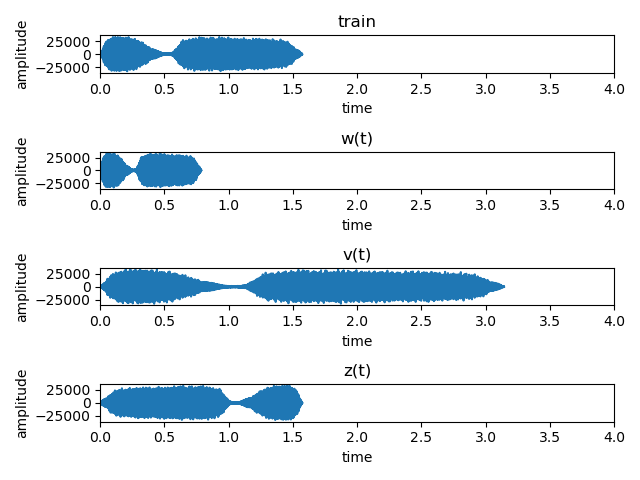

In [79]:
# Assignment 3 - Time Scaling Audio Signals

# Part B

# creating x(t) 
x, t_x = timescale(x1, fs1, 1.0)

# creating w(t) that scales x1 by 2
w, t_w = timescale(x1, fs1, 2.0)

# creating v(t) that scales x1 by 0.5
v, t_v = timescale(x1, fs1, 0.5)

# time reversed version
z, t_z = timescale(x1, fs1, 1.0)
z_flip = np.flip(z)

# saving signals to wav file
wav.write('train_w.wav', fs1, w.astype('int16'))
wav.write('train_v.wav', fs1, v.astype('int16'))
wav.write('train_z.wav', fs1, z_flip.astype('int16'))


# Part C

# plotting original train signal
plt.subplot(411)
plt.plot(t_x, x1)
plt.ylabel('amplitude')
plt.xlabel('time')
plt.title('train')
plt.xlim([0.0, 4.0])

# plotting w(t)
plt.subplot(412)
plt.plot(t_w, w)
plt.ylabel('amplitude')
plt.xlabel('time')
plt.title('w(t)')
plt.xlim([0.0, 4.0])

# plotting v(t)
plt.subplot(413)
plt.plot(t_v, v)
plt.ylabel('amplitude')
plt.xlabel('time')
plt.title('v(t)')
plt.xlim([0.0, 4.0])

# plotting z(t)
plt.subplot(414)
plt.plot(t_x, z_flip)
plt.ylabel('amplitude')
plt.xlabel('time')
plt.title('z(t)')
plt.xlim([0.0, 4.0])

plt.tight_layout()

# Part D

# reading in audio files
wav_obj_w = sa.WaveObject.from_wave_file('train_w.wav')
wav_obj_v = sa.WaveObject.from_wave_file('train_v.wav')
wav_obj_z = sa.WaveObject.from_wave_file('train_z.wav')

# plays original audio along with each timescaled signal audio
play_obj_32 = wav_obj_32.play()
play_obj_32.wait_done()

play_obj_w = wav_obj_w.play()
play_obj_w.wait_done()

play_obj_v = wav_obj_v.play()
play_obj_v.wait_done()

play_obj_z = wav_obj_z.play()
play_obj_z.wait_done()

###  Discussion

If the student were to run the figure command before every call to subplot, then, the output would be four seperated graphs in their own respective box, instead of all four graphs being in 1 box. Furthermore, the position of each graph will be in there respective spot with the given subplot command. Where the first plot will be at the top in a different box. The second plot will have an empty white space above and then be graphed lower in another different box, and so on. The plots itself will remain the same because the figure command only segregates where the output and location will be, does not affect the actual data or input of the plots. 

## Section 4: Time Shift Operations

In [123]:
# Time Shift Functions

# Part A

# x: input signal vector
# fs: sampling frequency (in Hz)
# t0: time shift (in seconds) 
# returns t: time samples vector corresponding to y: timeshifted signal 

def timeshift(x, fs, t0):
    # calculating integer shift
    audio_in_sec = len(x) / fs
    audio_in_sec_with_t0 = (audio_in_sec - t0)
    y_length = audio_in_sec_with_t0 * fs
    n0 = abs(int(y_length - len(x)))
    n0_zeros = np.zeros(n0)
    if t0 < 0: # signal is delayed
        y = np.concatenate([n0_zeros, x])
    else: # signal is advanced
        y = x[n0:]
        y = np.concatenate([y, n0_zeros])
    t = np.arange(0,len(y),1)*(1.0/fs)
    return y, t

<IPython.core.display.Javascript object>


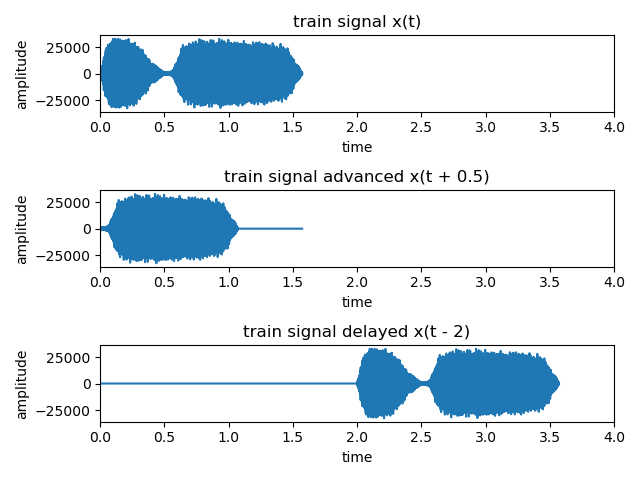

In [137]:
# Time Shift Operation

# Part B

# creating original signal, x1(t)
x, x_t = timeshift(x1, fs1, 0)

# creating advanced signal, x1(t + 0.5)
advanced_signal, advanced_signal_t = timeshift(x1, fs1, 0.5)

# creating delayed signal, x1(t - 2)
delayed_signal, delayed_signal_t = timeshift(x1, fs1, -2)

# plotting original train signal
plt.figure(2)
plt.subplot(311)
plt.plot(x_t, x)
plt.ylabel('amplitude')
plt.xlabel('time')
plt.title('train signal x(t)')
plt.xlim([0.0, 4.0])

# plotting x1(t + 0.5)
plt.subplot(312)
plt.plot(advanced_signal_t, advanced_signal)
plt.ylabel('amplitude')
plt.xlabel('time')
plt.title('train signal advanced x(t + 0.5)')
plt.xlim([0.0, 4.0])

# plotting x1(t - 2)
plt.subplot(313)
plt.plot(delayed_signal_t, delayed_signal)
plt.ylabel('amplitude')
plt.xlabel('time')
plt.title('train signal delayed x(t - 2)')
plt.xlim([0.0, 4.0])

plt.tight_layout()

# Part C

# saving signals to wav file
wav.write('train_advanced.wav', fs1, advanced_signal.astype('int16'))
wav.write('train_delayed.wav', fs1, delayed_signal.astype('int16'))

# reading in audio files
wav_obj_advanced = sa.WaveObject.from_wave_file('train_advanced.wav')
wav_obj_delayed = sa.WaveObject.from_wave_file('train_delayed.wav')

# plays original audio along with each timeshifted signal audio
play_obj_32 = wav_obj_32.play()
play_obj_32.wait_done()

play_obj_advanced = wav_obj_advanced.play()
play_obj_advanced.wait_done()

play_obj_delayed = wav_obj_delayed.play()
play_obj_delayed.wait_done()

### Discussion

Code correctly handles this case, from the cell above, we used a time shift of 0 which returned the same signal as displayed in Figure 2. With an advance bigger than the original signal (1.57 seconds), using 2 seconds the output will be zero as displayed in Figure 3.

<IPython.core.display.Javascript object>


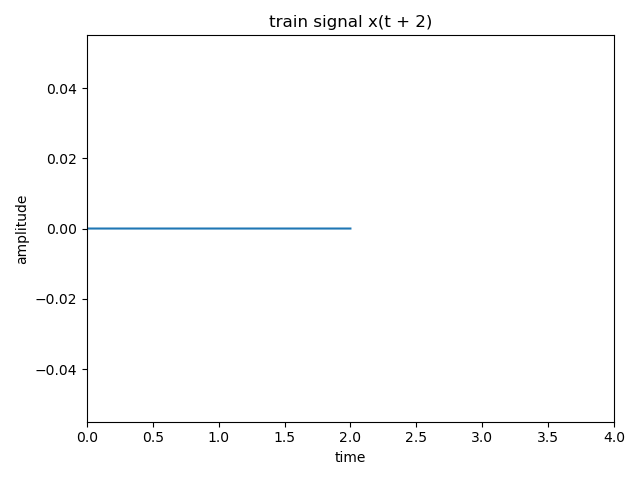

In [139]:
# creating advanced signal, x1(t + 2)
advanced_signal_big, advanced_signal_t_big = timeshift(x1, fs1, 2)

# plotting x1(t + 2)
plt.figure(3)
plt.subplot(111)
plt.plot(advanced_signal_t_big, advanced_signal_big)
plt.ylabel('amplitude')
plt.xlabel('time')
plt.title('train signal x(t + 2)')
plt.xlim([0.0, 4.0])
plt.tight_layout()